Sofiia Popeniuk, Lushpak Victoriia

Problem Statement and Experiment Setup:
To evaluate the performance of Prima's algorithm, we have implemented our own version and compared its execution time with a built-in algorithm. The objective is to assess the efficiency and effectiveness of our implementation in finding minimum spanning trees compared to established algorithms.

In [219]:
!pip install networkx
!pip install matplotlib
!pip install tqdm


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [8]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations, groupby
from copy import deepcopy

## Generating graph

In [6]:
# You can use this function to generate a random graph with 'num_of_nodes' nodes
# and 'completeness' probability of an edge between any two nodes
# If 'directed' is True, the graph will be directed
# If 'draw' is True, the graph will be drawn
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """

    
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))
    
    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)
                
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)
                
    if draw: 
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue', 
                    with_labels=True,
                    node_size=500, 
                    arrowsize=20, 
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)
            
        else:
            nx.draw(G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)
        
    return G

In [13]:
def weight_build_in_algorithm(mstp: object) -> int:
    """
    Weight of build in algorithm.
    """
    output_weight = 0
    conections = dict(mstp.adjacency())
    edges = mstp.edges()
    for edge in edges:
        for node_num, conection in conections.items():
            if node_num == edge[0]:
                for connected_node, weight in conection.items():
                    if connected_node == edge[1]:
                        output_weight += weight['weight']
                        break
    return output_weight

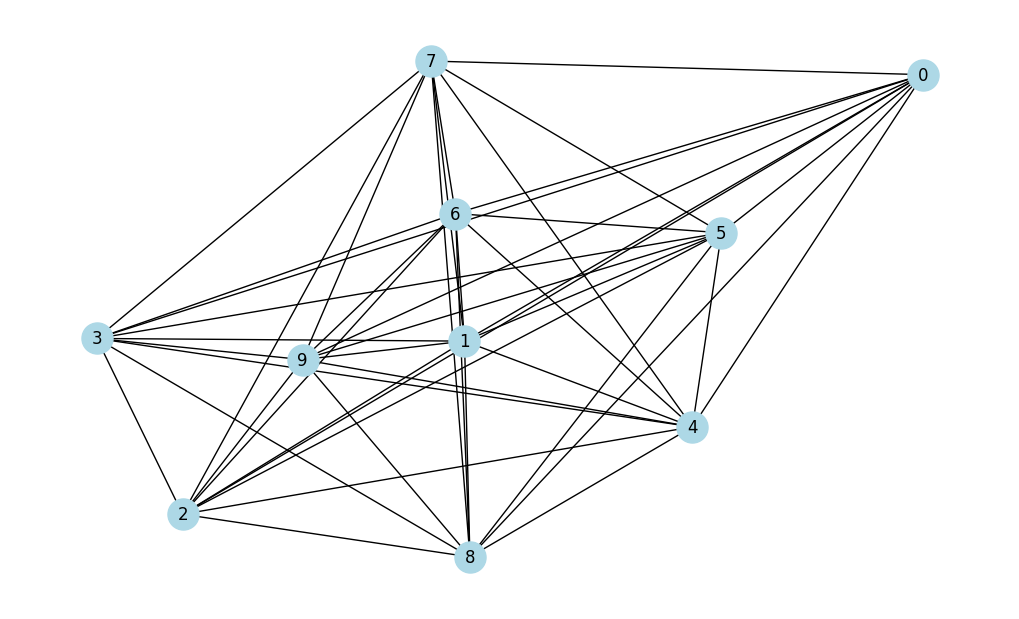

In [9]:
G = gnp_random_connected_graph(10, 1, False, True)

In [3]:
from networkx.algorithms import tree

## Prim's algorithm

In [10]:
mstp = tree.minimum_spanning_tree(G, algorithm="prim")

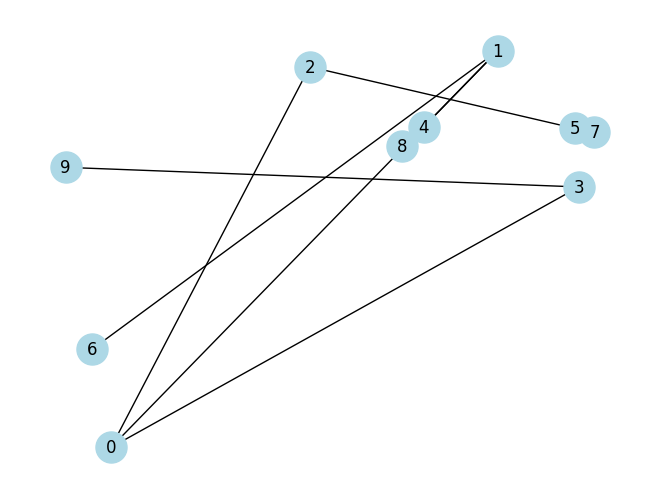

In [209]:
nx.draw(mstp, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

In [11]:
mstp.edges(), len(mstp.edges())

(EdgeView([(0, 2), (0, 9), (0, 3), (1, 5), (2, 5), (3, 4), (4, 7), (6, 9), (7, 8)]),
 9)

In [211]:
import heapq
def has_cycle_dfs(edges: list, current: int, visited: int, parent: int) -> bool:
    """
    Depth-first search.
    """
    visited.add(current)
    for edge in edges:
        node, neighbor = edge
        if node == current:
            if neighbor not in visited:
                if has_cycle_dfs(edges, neighbor, visited, current):
                    return True
            elif neighbor != parent:
                return True
        elif neighbor == current:
            if node not in visited:
                if has_cycle_dfs(edges, node, visited, current):
                    return True
            elif node != parent:
                return True
    return False

def has_cycle(edges: list) -> bool:
    """
    Checks if the graph contains any cycles.
    >>> has_cycle([(1, 2), (2, 3), (1, 3)])
    True
    """
    visited = set()
    for edge in edges:
        node, neighbor = edge
        if node not in visited:
            if has_cycle_dfs(edges, node, visited, None):
                return True
        if neighbor not in visited:
            if has_cycle_dfs(edges, neighbor, visited, None):
                return True
        visited.add(node)
        visited.add(neighbor)
    return False

def main(G):
    """
    >>> main(G) == weight_build_in_algorithm(mstp)
    True
    """
    connections = dict(G.adjacency())
    heap = [(data['weight'], node, neighbor) for node, edges in connections.items() for neighbor, data in edges.items()]
    heapq.heapify(heap)
    visited = set([0])
    prima = []
    output_weight = 0
    while len(prima) != len(connections) - 1:
        weight, node, neighbor = heapq.heappop(heap)
        if (has_cycle(prima + [(node, neighbor)]) is False):
            visited.add(node)
            visited.add(neighbor)
            prima.append((node, neighbor))
            output_weight += weight
    return output_weight
if __name__ == '__main__':
    import doctest
    print(doctest.testmod())


TestResults(failed=0, attempted=2)


## Example on time measuring

Read more on this: https://realpython.com/python-timer/

Recall that you should measure times for 5, 10, 20, 50, 100, 200, 500 nodes 1000 times (and take mean of time taken for each node amount).

Then you should build the plot for two algorithms (x - data size, y - mean time of execution).

In [214]:
import time
from tqdm import tqdm

In [215]:
NUM_OF_ITERATIONS = 1000
time_taken = 0
for i in tqdm(range(NUM_OF_ITERATIONS)):
    
    # note that we should not measure time of graph creation
    G = gnp_random_connected_graph(100, 0.4, False)
    
    start = time.time()
    tree.minimum_spanning_tree(G, algorithm="prim")
    end = time.time()
    
    time_taken += end - start

time_taken / NUM_OF_ITERATIONS

100%|██████████| 1000/1000 [00:03<00:00, 328.74it/s]


0.0008434839248657227

100%|██████████| 1000/1000 [06:41<00:00,  2.49it/s]


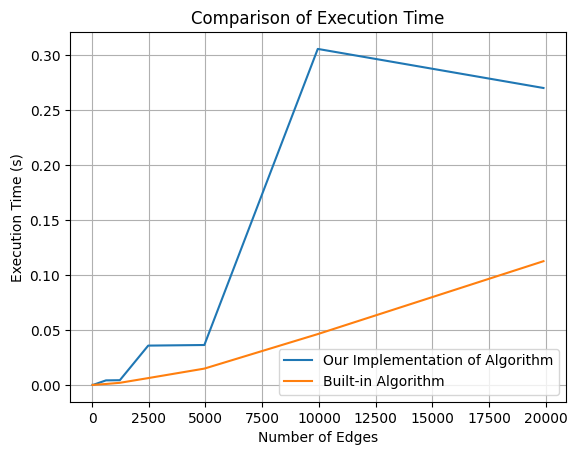

In [228]:
import time
import matplotlib.pyplot as plt
from tqdm import tqdm

NUM_OF_ITERATIONS = 1000
graph_sizes = [10, 50, 100, 200]
fullness_levels = [0.5, 1]

main_execution_times = []
built_in_algorithm_execution_times = []
num_edges = []

for size in graph_sizes:
    for fullness in fullness_levels:
        my_time = 0
        built_in_time = 0
        for i in tqdm(range(NUM_OF_ITERATIONS)):
            G = gnp_random_connected_graph(size, fullness, False, False)
            
            start_main_execution = time.time()
            main_execution_time = main(G)
            end_main_execution = time.time()
            my_time += end_main_execution - start_main_execution
            
            start_built_in_execution = time.time()
            build_in_algorithm_execution_time = weight_build_in_algorithm(G)
            end_built_in_execution = time.time()
            built_in_time += end_built_in_execution - start_built_in_execution
        
        main_execution_times.append(my_time / 1000)
        built_in_algorithm_execution_times.append(built_in_time / 1000)
        num_edges.append(size * (size - 1) / 2 * fullness)

# Plot the results
plt.plot(num_edges, main_execution_times, label='Our Implementation of Algorithm')
plt.plot(num_edges, built_in_algorithm_execution_times, label='Built-in Algorithm')
plt.xlabel('Number of Edges')
plt.ylabel('Execution Time (s)')
plt.title('Comparison of Execution Time')
plt.legend()
plt.grid(True)
plt.show()


On small graphs (25 and 45 edges): our algorithm operates efficiently, demonstrating similar performance to the built-in Prim's algorithm.

On medium-sized graphs (615 and 1225 edges): A slight time difference was observed, but it is quite small (0.01 seconds). This may be due to certain peculiarities in the implementation of our algorithm.

On large graphs (2475, 4950, 9950, and 19900 edges): An increase in execution time of our algorithm compared to the built-in one has been noted. This may indicate that our algorithm may be less optimized for large graphs or may require optimization to improve performance.


So, overall, it can be noted that our algorithm works effectively on small and medium-sized graphs, where it demonstrates similar performance to the built-in Prim's algorithm. However, when it comes to large graphs, an increase in execution time of our algorithm compared to the built-in one is observed. This may indicate the necessity for additional optimization of our algorithm for optimal operation on large datasets, where performance is of significant importance.

In [15]:
mstk = tree.minimum_spanning_tree(G, algorithm="kruskal")
def min_weight(conections: dict) -> tuple:
    """
    >>> min_weight({0: {1: {'weight': -4}, 2: {'weight': 9}}, 1: {0: {'weight': -4}, \
2: {'weight': 0}}, 2: {0: {'weight': 9}, 1: {'weight': 0}}})
    ((0, 1), -4)
    """
    min_start_point = 0
    min_end_point = 0
    output_weight = float("inf")
    for node_num, conection in conections.items():
        for connected_node, weight in conection.items():
            if weight['weight'] < output_weight:
                output_weight = weight['weight']
                min_start_point = node_num
                min_end_point = connected_node
    return (min_start_point, min_end_point), output_weight

def has_cycle_dfs(edges: list, current: int, visited: int, parent: int) -> bool:
    """
    Depth-first search.
    """
    visited.add(current)
    for edge in edges:
        node, neighbor = edge
        if node == current:
            if neighbor not in visited:
                if has_cycle_dfs(edges, neighbor, visited, current):
                    return True
            elif neighbor != parent:
                return True
        elif neighbor == current:
            if node not in visited:
                if has_cycle_dfs(edges, node, visited, current):
                    return True
            elif node != parent:
                return True
    return False

def has_cycle(edges: list) -> bool:
    """
    Checks if the graph contains any cycles.
    >>> has_cycle([(1, 2), (2, 3), (1, 3)])
    True
    """
    visited = set()
    for edge in edges:
        node, neighbor = edge
        if node not in visited:
            if has_cycle_dfs(edges, node, visited, None):
                return True
        if neighbor not in visited:
            if has_cycle_dfs(edges, neighbor, visited, None):
                return True
        visited.add(node)
        visited.add(neighbor)
    return False

def kruskala(G:object) -> int:
    """
    >>> kruskala(G) == weight_build_in_algorithm(mstk)
    True
    """
    graph = deepcopy(G)
    conections = dict(graph.adjacency())
    length = len(conections) - 1
    weight = 0
    visited = set()
    kruskal = []
    while len(kruskal) < length:
        try_conection, edge_weight = min_weight(conections)
        if (try_conection[1], try_conection[0]) not in kruskal:
            if has_cycle(kruskal + [try_conection]) is False:
                weight += edge_weight
                kruskal.append(try_conection)
                visited.add(try_conection[0])
                visited.add(try_conection[1])
        del conections[try_conection[0]][try_conection[1]]
    return weight
if __name__ == '__main__':
    import doctest
    print(doctest.testmod())    


TestResults(failed=0, attempted=3)


100%|██████████| 1000/1000 [03:01<00:00,  5.50it/s]


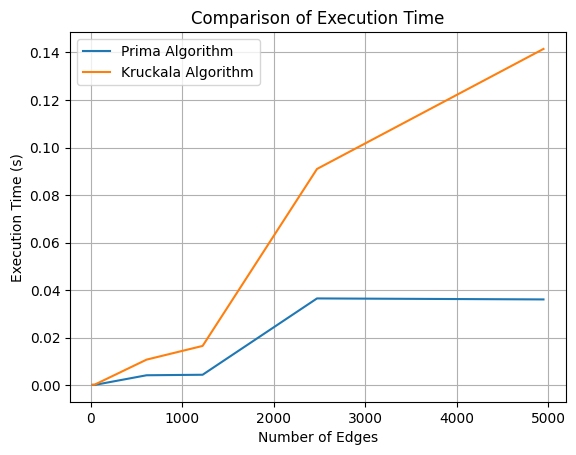

In [232]:
import time
import matplotlib.pyplot as plt
from tqdm import tqdm

NUM_OF_ITERATIONS = 1000
graph_sizes = [10, 50, 100]
fullness_levels = [0.5, 1]

main_execution_times = []
kruskala_execution_times = []
num_edges = []

for size in graph_sizes:
    for fullness in fullness_levels:
        my_time = 0
        kruskala_time = 0
        for i in tqdm(range(NUM_OF_ITERATIONS)):
            G = gnp_random_connected_graph(size, fullness, False, False)
            
            start_main_execution = time.time()
            main_execution_time = main(G)
            end_main_execution = time.time()
            my_time += end_main_execution - start_main_execution
            
            start_kruskala_execution = time.time()
            kruskala_execution_time = kruskala(G)
            end_kruskala_execution = time.time()
            kruskala_time += end_kruskala_execution - start_kruskala_execution
        
        main_execution_times.append(my_time / 1000)
        kruskala_execution_times.append(kruskala_time / 1000)
        num_edges.append(size * (size - 1) / 2 * fullness)

# Plot the results
plt.plot(num_edges, main_execution_times, label='Prima Algorithm')
plt.plot(num_edges, kruskala_execution_times, label='Kruckala Algorithm')
plt.xlabel('Number of Edges')
plt.ylabel('Execution Time (s)')
plt.title('Comparison of Execution Time')
plt.legend()
plt.grid(True)
plt.show()


Overall, our Prim's algorithm performs faster than the Kruskal's algorithm. This can be attributed to several factors. Firstly, in Prim's algorithm, we utilize the additional heapq module, which is optimized for heap operations and contributes to faster execution. Additionally, Prim's algorithm selects edges only from the incident edges of the current set, while Kruskal's algorithm considers edges from the entire graph. This difference in edge selection strategies can lead to Prim's algorithm being more efficient, especially in scenarios where the number of edges is significantly larger than the number of vertices, as it reduces the number of edges that need to be evaluated at each step.